In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob

In [47]:
calibrated_sim = np.load("../../outputs/numpy_arrays/np_output_calibrated_2022-05-02_02-11-37-317448.npy")

In [48]:
calibrated_sim.shape

(51, 2, 2, 6)

In [49]:
n = 50
x = []
y = []

n_str = str(n)
while len(n_str) < 3:
    n_str = "0" + n_str

files = sorted(glob(f"../../outputs/numpy_arrays/np_output_calibrated_to_NHIS_{n_str}*"))
x.append(n)
to_avg = []

for f in files:
    arr = np.load(f)
    arr = np.sum(arr, axis=(1,2))
    smoking_percents = np.sum(arr[:,2:-2], axis=1) / np.sum(arr[:,:], axis=1)
    # smoking_percents = smoking_percents[:10]
    # print(num, smoking_percents)

    to_avg.append(smoking_percents)



In [50]:
to_avg = np.array(to_avg)

In [51]:
adjs = np.mean(to_avg, axis=0)
adjs

array([0.14626748, 0.14807883, 0.14595399, 0.14414796, 0.14305526,
       0.14181879, 0.14007453, 0.13850749, 0.13757722, 0.13670353,
       0.13657859, 0.13702446, 0.13602177, 0.13525753, 0.13430358,
       0.13361367, 0.13276337, 0.13117712, 0.12969719, 0.12833516,
       0.12683123, 0.12537761, 0.12357764, 0.12187799, 0.12013227,
       0.11790309, 0.11576541, 0.11347118, 0.111251  , 0.10811197,
       0.1059265 , 0.10348926, 0.10061015, 0.09763773, 0.09502161,
       0.09219501, 0.08948573, 0.08679823, 0.08398733, 0.08160827,
       0.0788479 , 0.07601561, 0.07365495, 0.07108473, 0.06809264,
       0.06571851, 0.06284928, 0.06014908, 0.05780938, 0.05522693,
       0.05244488])

In [52]:
target_arr = pd.read_excel("/home/nick/Gillings_work/nhis_data/NHIS_smoker_proportions./NHIS_State_age/NHIS_State_age/percent_34_by_year.xlsx").to_numpy()
target_arr = target_arr[:,1] / 100
target_arr

array([0.13776604, 0.12563898, 0.1239768 , 0.12335997, 0.11472149])

In [53]:
cys = calibrated_sim[:10]
cys = np.sum(cys, axis=(1,2))
cys = np.sum(cys[:,2:-2], axis=1) / np.sum(cys, axis=1)
cys



array([0.14626748, 0.14747231, 0.14771924, 0.14835835, 0.14878868,
       0.14839372, 0.14706429, 0.15079121, 0.15010001, 0.14784395])

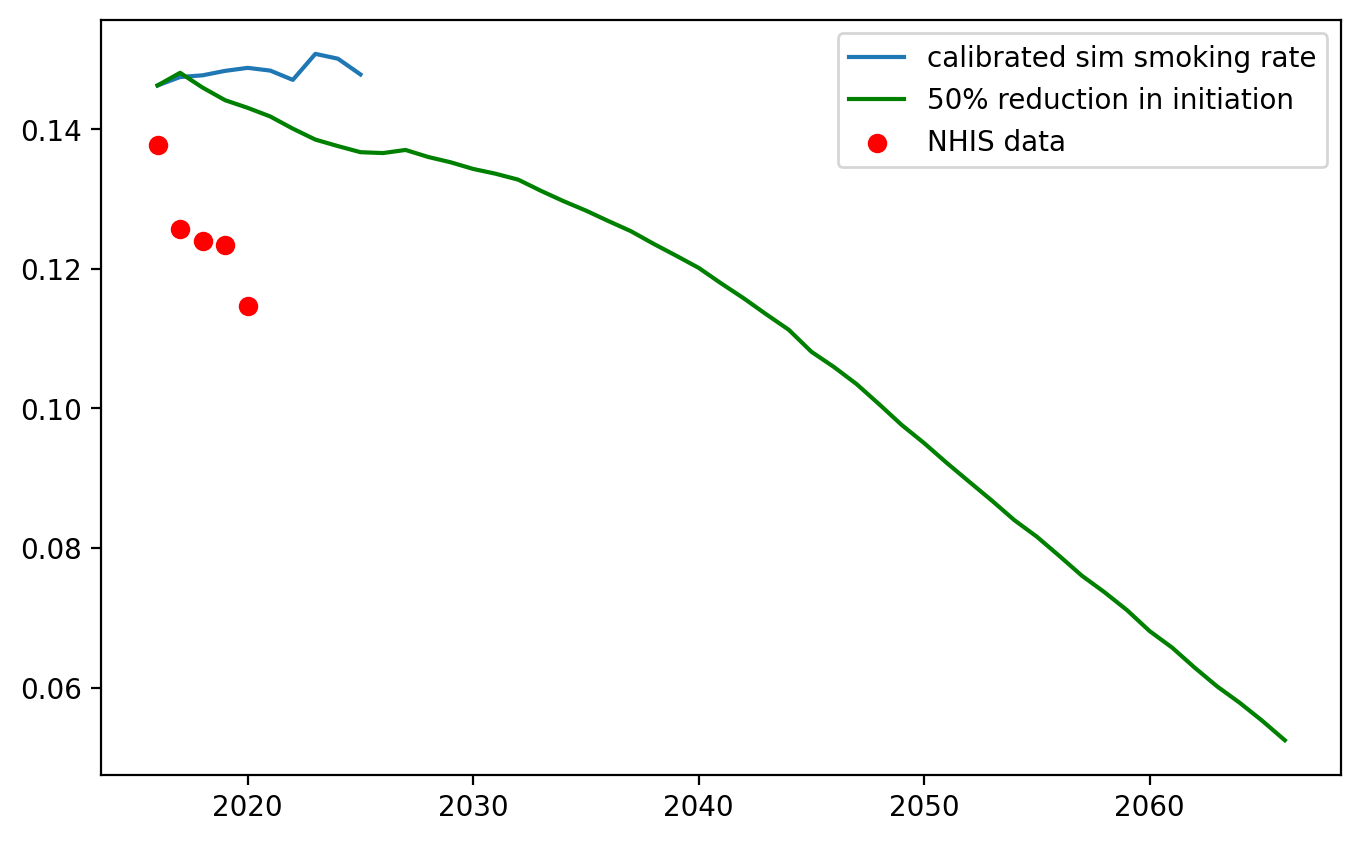

In [58]:
fig, ax = plt.subplots(1,1,figsize=(8,5),dpi=200)
x0 = np.arange(2016,2026)
ax.plot(x0, cys)
x0 = np.arange(2016,2067)
ax.plot(x0, adjs, c='g')
x1 = np.arange(2016, 2021)
ax.scatter(x1, target_arr, c='r')
# plt.ylim(0.1, 0.18)
ax.legend(labels=[f"calibrated sim smoking rate", f"{str(n)}% reduction in initiation", "NHIS data"])

In [55]:
x1

array([2016, 2017, 2018, 2019, 2020])

In [56]:
target_arr

array([0.13776604, 0.12563898, 0.1239768 , 0.12335997, 0.11472149])